## Exploring the Bitcoin Cryptocurrency Market

Explore the market capitalization of Bitcoin and other cryptocurrencies.

#### Project Description

To better understand the growth and impact of Bitcoin and other cryptocurrencies you will, in this project, explore the market capitalization of different cryptocurrencies.

<b>Warning:</b> The cryptocurrency market is exceptionally volatile, and any money you put in might disappear into thin air. Never invest money you can't afford to lose.

### Project Tasks

1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility
2. Discard the cryptocurrencies without a market capitalization
3. How big is Bitcoin compared with the rest of the cryptocurrencies?
4. Making the plot easier to read and more informative
5. What is going on?! Volatility in cryptocurrencies
6. Well, we can already see that things are *a bit* crazy
7. Ok, those are... interesting. Let's check the weekly Series too.
8. How small is small?
9. Most coins are tiny

## 1. Bitcoin and Cryptocurrencies: Full dataset, filtering, and reproducibility
<p>Since the <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">launch of Bitcoin in 2008</a>, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future<sup>1</sup>. In fact, on the 6th of December of 2017, Bitcoin has a <a href="https://en.wikipedia.org/wiki/Market_capitalization">market capitalization</a> above $200 billion. </p>
<p

<center>
<img src="datasets//bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>The astonishing increase of Bitcoin market capitalization in 2017.</em></center>

<p>*<sup>1</sup> <strong>WARNING</strong>: The cryptocurrency market is exceptionally volatile<sup>2</sup> and any money you put in might disappear into thin air.  Cryptocurrencies mentioned here <strong>might be scams</strong> similar to <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Ponzi Schemes</a> or have many other issues (overvaluation, technical, etc.). <strong>Please do not mistake this for investment advice</strong>. *</p>
<p><em><sup>2</sup> <strong>Update on March 2020</strong>: Well, it turned out to be volatile indeed :D</em></p>
<p>That said, let's get to business. We will start with a CSV we conveniently downloaded on the 6th of December of 2017 using the coinmarketcap API (NOTE: The public API went private in 2020 and is no longer available) named <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
coin_market_dec6_2017 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

display(coin_market_dec6_2017.head())
print("Column Names in coin_market_dec6_2017:\n", coin_market_dec6_2017.columns)
print("Shape of the dataset: coin_market_dec6_2017:", coin_market_dec6_2017.shape)

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = coin_market_dec6_2017[ ['id', 'market_cap_usd'] ]
display("First Five rows of market_cap_raw:",  market_cap_raw.head() )


,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


Column Names in coin_market_dec6_2017:
 Index(['Unnamed: 0', '24h_volume_usd', 'available_supply', 'id',
       'last_updated', 'market_cap_usd', 'max_supply', 'name',
       'percent_change_1h', 'percent_change_24h', 'percent_change_7d',
       'price_btc', 'price_usd', 'rank', 'symbol', 'total_supply'],
      dtype='object')
Shape of the dataset: coin_market_dec6_2017: (1326, 16)


'First Five rows of market_cap_raw:'

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


In [56]:
# remove un-necessary columns:
cols_to_drop = ['Unnamed: 0']
coin_market_dec6_2017.drop(columns = cols_to_drop, axis = 1, inplace = True) 

In [16]:
# Counting the number of values
# ... YOUR CODE FOR TASK 2 ...
print("Shape of market_cap_raw:", market_cap_raw.shape)

unique_cryptos_list = list( market_cap_raw['id'].unique() )

print('First five Unique CryptoCurrency (id):', unique_cryptos_list[:5])
print("Total Unique CryptoCurrency (id):", len(unique_cryptos_list))

print("Number of Not NULL (actualy values) in market_cap_raw:\n", market_cap_raw.count())

market_cap_raw['id'].value_counts()

Shape of market_cap_raw: (1326, 2)
First five Unique CryptoCurrency (id): ['bitcoin', 'ethereum', 'bitcoin-cash', 'iota', 'ripple']
Total Unique CryptoCurrency (id): 1326
Number of Not NULL (actualy values) in market_cap_raw:
 id                1326
market_cap_usd    1031
dtype: int64


populous                 1
ox-fina                  1
biteur                   1
mintcoin                 1
first-bitcoin-capital    1
                        ..
concoin                  1
iquant                   1
bitstar                  1
aeron                    1
fuzzballs                1
Name: id, Length: 1326, dtype: int64

In [14]:
# number of missing values in market_cap_raw
print("Number of NULL/NaN in id and market_cap_usd columns:\n", market_cap_raw.isnull().sum())

Number of NULL/NaN in id and market_cap_usd columns:
 id                  0
market_cap_usd    295
dtype: int64


In [5]:
print("Number of not NaN/NUll values in each column:\n", market_cap_raw.count())
print("Crypto-currencies which have no Market Cap used:")
market_cap_raw[ market_cap_raw['market_cap_usd'].isnull() ].head(10)

Number of not NaN/NUll values in each column:
 id                1326
market_cap_usd    1031
dtype: int64
Crypto-currencies which have no Market Cap used:


,id,market_cap_usd
1031,atmcoin,NaN
1032,cybermiles,NaN
1033,bitcoin-diamond,NaN
1034,electroneum,NaN
1035,poly-ai,NaN
1036,gold-reward-token,NaN
1037,ormeus-coin,NaN
1038,clubcoin,NaN
1039,regalcoin,NaN
1040,nuls,NaN


## 2. Discard the cryptocurrencies without a market capitalization
<p>Why do the <code>count()</code> for <code>id</code> and <code>market_cap_usd</code> differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by <code>NaN</code> in the data, and <code>NaN</code>s are not counted by <code>count()</code>. These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.</p>

In [6]:
print("Number of not NaN/NUll values in each column:\n", market_cap_raw.count())

Number of not NaN/NUll values in each column:
 id                1326
market_cap_usd    1031
dtype: int64


In [26]:
# Filtering out rows without a market capitalization
# filtering out those coins whuch have no market capitalization value

# cap =  market_cap_raw[ market_cap_raw['market_cap_usd'] > 0 ]

# filtering rows using query function..
cap = market_cap_raw.query('market_cap_usd > 0')

print("Shape of cap:",  cap.shape)

# Counting the number of values again
# ... YOUR CODE FOR TASK 3 ...
print("Number of values in each column:\n", cap.count())

display("Non Null/NaN values:", cap.agg(['count']) )

Shape of cap: (1031, 2)
Number of values in each column:
 id                1031
market_cap_usd    1031
dtype: int64


'Non Null/NaN values:'

,id,market_cap_usd
count,1031,1031


## 3. How big is Bitcoin compared with the rest of the cryptocurrencies?
<p>At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.</p>

In [46]:
# top 10 coins which have higher market capitalization
cap10 = cap.sort_values(by = ['market_cap_usd'], ascending = False).head(10)
display("First Five rows of cap10:", cap10)

# Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 Market Capitalization'
TOP_CAP_YLABEL = '% of Total Capitalization'

cap10 = cap10.set_index(keys = 'id')
market_cap_usd_total =  cap['market_cap_usd'].sum()
print("The value of market_cap_usd_total:", market_cap_usd_total)

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_per = lambda x: (x['market_cap_usd'] / market_cap_usd_total) * 100.0)

cap10.head(10)

'First Five rows of cap10:'

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09
5,dash,5.794076e+09
6,litecoin,5.634498e+09
7,bitcoin-gold,4.920065e+09
8,monero,4.331688e+09
9,cardano,3.231420e+09


The value of market_cap_usd_total: 374304867542.0


,market_cap_usd,market_cap_per
id,,
bitcoin,2.130493e+11,56.918669
ethereum,4.352945e+10,11.629410
bitcoin-cash,2.529585e+10,6.758088
iota,1.475225e+10,3.941238
ripple,9.365343e+09,2.502063
dash,5.794076e+09,1.547956
litecoin,5.634498e+09,1.505323
bitcoin-gold,4.920065e+09,1.314454
monero,4.331688e+09,1.157262


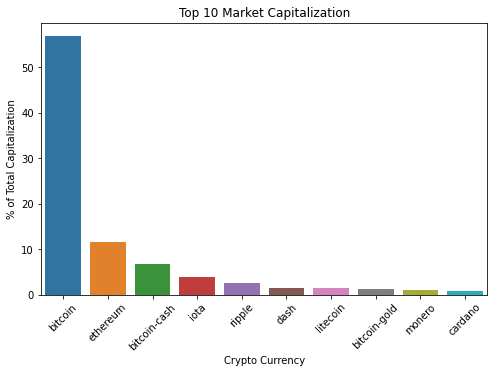

In [47]:
# Plotting the barplot with the title defined above 
plt.figure(figsize = (8, 5))
sns.barplot(data = cap10, x = cap10.index, y = 'market_cap_per')

# Annotating the y axis with the label defined above
# ... YOUR CODE FOR TASK 4 ...
plt.title(TOP_CAP_TITLE)
plt.xlabel('Crypto Currency')
plt.ylabel(TOP_CAP_YLABEL)
plt.xticks(rotation = 45)

plt.show()

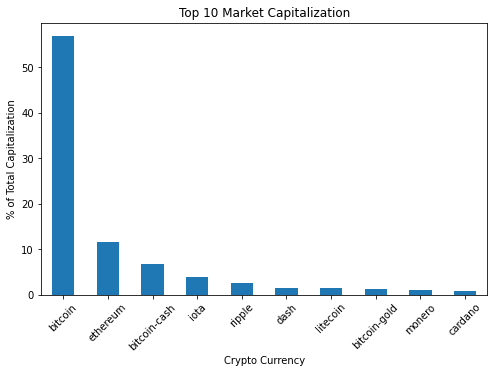

In [75]:
# using matplotlib.
cap10['market_cap_per'].plot.bar(figsize = (8, 5) )

plt.title(TOP_CAP_TITLE)
plt.xlabel('Crypto Currency')
plt.ylabel(TOP_CAP_YLABEL)
plt.xticks(rotation = 45)

plt.show()

## 4. Making the plot easier to read and more informative
<p>While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log<sup>10</sup> scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative<sup>1</sup>. </p>
<p>For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a><sup>2</sup>. Ethereum and Cardano both offer Turing Complete <a href="https://en.wikipedia.org/wiki/Smart_contract">smart contracts</a>. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.</p>
<p><sup>1</sup> <em>This coloring is a simplification. There are more differences and similarities that are not being represented here.</em></p>
<p><sup>2</sup> <em>The bitcoin forks are actually <strong>very</strong> different, but it is out of scope to talk about them here. Please see the warning above and do your own research.</em></p>

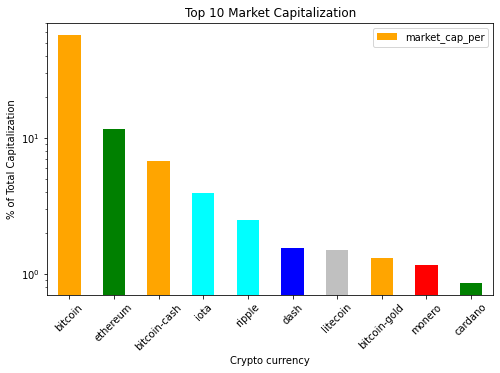

In [79]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']
# Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 Market Capitalization'
TOP_CAP_YLABEL = '% of Total Capitalization'

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis  
cap10.plot.bar( y = 'market_cap_per', color = COLORS, logy = True, figsize = (8, 5))

plt.title(TOP_CAP_TITLE)
plt.xlabel('Crypto currency')
plt.ylabel(TOP_CAP_YLABEL)
plt.xticks(rotation = 45)

plt.show()

## 5. What is going on?! Volatility in cryptocurrencies
<p>The cryptocurrencies market has been spectacularly volatile since the first exchange opened. This notebook didn't start with a big, bold warning for nothing. Let's explore this volatility a bit more! We will begin by selecting and plotting the 24 hours and 7 days percentage change, which we already have available.</p>

In [57]:
display( coin_market_dec6_2017.head() )

# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = coin_market_dec6_2017[ ['id', 'percent_change_24h', 'percent_change_7d'] ]
print("Before dropping NaN/NuLL:\n", volatility.isnull().sum())
# print("First Five rows of datast\n:", volatility.head())

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.dropna(axis = 0).set_index(keys = 'id')
display("First Five rows of datast\n:", volatility.head())
print("After dropping NaN/NULL:\n", volatility.isnull().sum())

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values(by = 'percent_change_24h')

# Checking the first few rows
# ... YOUR CODE FOR TASK 6 ...
display(volatility.head(10))

,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


Before dropping NaN/NuLL:
 id                     0
percent_change_24h    56
percent_change_7d     43
dtype: int64


'First Five rows of datast\n:'

,percent_change_24h,percent_change_7d
id,,
bitcoin,7.33,17.45
ethereum,-3.93,-7.33
bitcoin-cash,-5.51,-4.75
iota,83.35,255.82
ripple,-3.70,-14.79


After dropping NaN/NULL:
 percent_change_24h    0
percent_change_7d     0
dtype: int64


,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96
bitok,-74.37,-71.67
bankcoin,-68.56,50.14
tellurion,-63.75,-52.59
shadow-token,-61.40,-59.05


## 6. Well, we can already see that things are *a bit* crazy
<p>It seems you can lose a lot of money quickly on cryptocurrencies. Let's plot the top 10 biggest gainers and top 10 losers in market capitalization.</p>

In [58]:
volatility.head()

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


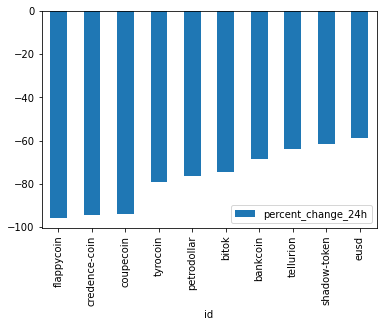

In [59]:
# for test (top 10 lossers)
top_10 = volatility.head(10)
top_10.plot.bar(y = 'percent_change_24h')

plt.show()

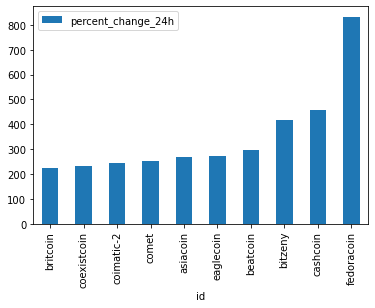

In [60]:
# for test (top 10 lossers)
bottom_10 = volatility.tail(10)
bottom_10.plot.bar(y = 'percent_change_24h')

plt.show()

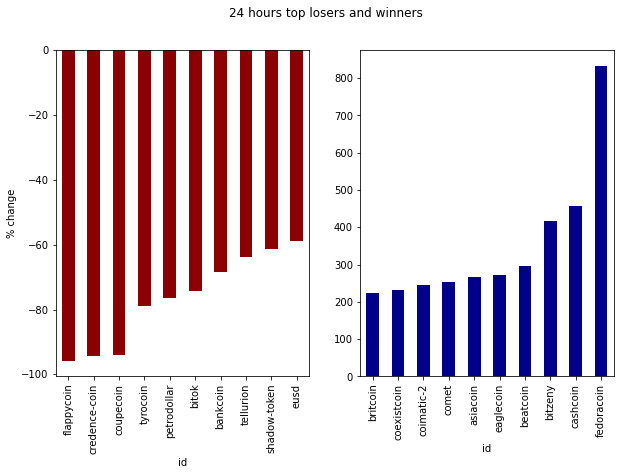

In [61]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = volatility_series[0:10].plot.bar(color = 'darkred', ax = axes[0])
    
    # Setting the figure's main title to the text passed as parameter    
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    # ... YOUR CODE FOR TASK 7 ...
    ax.set_ylabel("% change")
    
    # Same as above, but for the top 10 winners
    ax = volatility_series[-10:].plot.bar(color = 'darkblue', ax = axes[1])
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE  
fig, ax = top10_subplot(volatility['percent_change_24h'], DTITLE)

## 7. Ok, those are... interesting. Let's check the weekly Series too.
<p>800% daily increase?! Why are we doing this tutorial and not buying random coins?<sup>1</sup></p>
<p>After calming down, let's reuse the function defined above to see what is going weekly instead of daily.</p>
<p><em><sup>1</sup> Please take a moment to understand the implications of the red plots on how much value some cryptocurrencies lose in such short periods of time</em></p>

In [62]:
volatility.head(2)

,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31


,percent_change_24h,percent_change_7d
id,,
royalties,-9.06,-99.59
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
cagecoin,-36.26,-92.68
tyrocoin,-79.02,-87.43


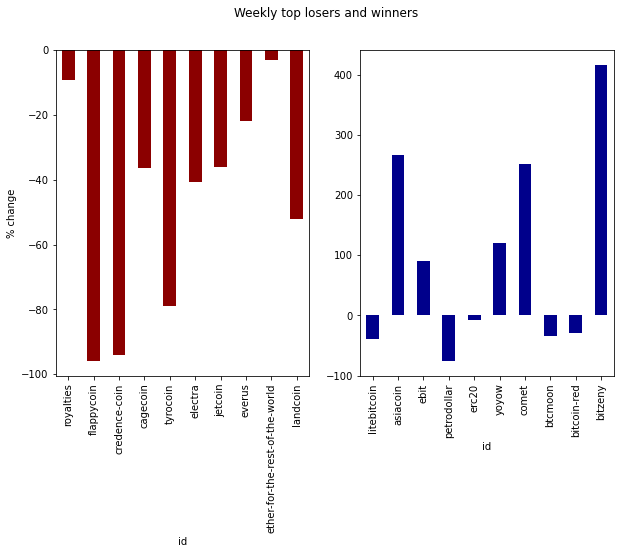

In [63]:
# Sorting in ascending order
# Sorting the DataFrame by percent_change_7d in ascending order
volatility7d = volatility.sort_values(by = 'percent_change_7d', ascending = True)

display(volatility7d.head())

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d['percent_change_24h'], WTITLE)

## 8. How small is small?
<p>The names of the cryptocurrencies above are quite unknown, and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones<sup>1</sup>. Let's classify our dataset based on Investopedia's capitalization <a href="https://www.investopedia.com/video/play/large-cap/">definitions</a> for company stocks. </p>
<p><sup>1</sup> <em>Cryptocurrencies are a new asset class, so they are not directly comparable to stocks. Furthermore, there are no limits set in stone for what a "small" or "large" stock is. Finally, some investors argue that bitcoin is similar to gold, this would make them more comparable to a <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> instead.</em></p>

In [64]:
coin_market_dec6_2017.columns

Index(['24h_volume_usd', 'available_supply', 'id', 'last_updated',
       'market_cap_usd', 'max_supply', 'name', 'percent_change_1h',
       'percent_change_24h', 'percent_change_7d', 'price_btc', 'price_usd',
       'rank', 'symbol', 'total_supply'],
      dtype='object')

In [65]:
# Selecting everything bigger than 10 billion 

market_cap_raw = coin_market_dec6_2017[ ['id','market_cap_usd'] ]
display("First five rows of market_cap_raw dataset:", market_cap_raw.head())

largecaps = market_cap_raw.query('market_cap_usd > 1E+10')
display("First five rows of largecaps dataset:", largecaps.head())
print("Shape of largecaps:", largecaps.shape)

# Printing out largecaps
# ... YOUR CODE FOR TASK 9 ...
largecaps.head()

'First five rows of market_cap_raw dataset:'

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


'First five rows of largecaps dataset:'

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


Shape of largecaps: (4, 2)


,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


In [66]:
# crytocurrency whose market capital is greater than I billon (10 millin)
top_caps_cryptos = coin_market_dec6_2017[ coin_market_dec6_2017['market_cap_usd'] >= 1E+9 ][ ['id', 'market_cap_usd'] ]
top_caps_cryptos.head()

,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10
4,ripple,9.365343e+09


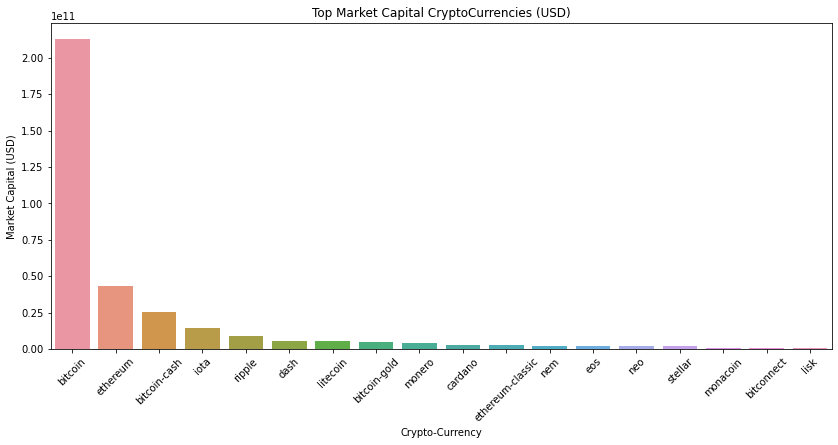

In [67]:
plt.figure(figsize = (14, 6))
sns.barplot(data = top_caps_cryptos, x = 'id', y = 'market_cap_usd')

plt.title("Top Market Capital CryptoCurrencies (USD)")
plt.xlabel('Crypto-Currency')
plt.ylabel("Market Capital (USD)")
plt.xticks(rotation = 45)

plt.show()

## 9. Most coins are tiny
<p>Note that many coins are not comparable to large companies in market cap, so let's divert from the original Investopedia definition by merging categories.</p>

In [70]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D

def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["Biggish", "Micro", "Nano"]

# Using capcount count the biggish cryptos having market_cap_usd value greater than 3E+8
biggish = capcount("market_cap_usd > 3E+8")

# Same as above for micro ...
micro = capcount("market_cap_usd > 5E+7 & market_cap_usd < 3E+8")

# ... and for nano
nano =  capcount("market_cap_usd < 5E+7 ")

# Making a list with the 3 counts
values = [biggish, micro, nano]

print("The count values of categories:",values)

The count values of categories: [39, 96, 896]


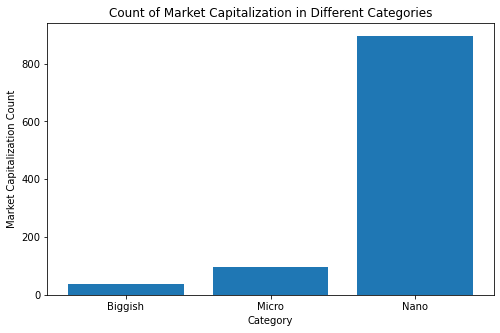

In [73]:
# Plotting them with matplotlib 
plt.figure(figsize = (8, 5))
plt.bar( range(len(values)), values, tick_label = LABELS )

plt.title("Count of Market Capitalization in Different Categories")
plt.xlabel("Category")
plt.ylabel("Market Capitalization Count")

plt.show()